In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [10]:
data = pd.read_csv('purchase_data.csv')  # Change this to your file path


In [11]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   customer_id     1000 non-null   int64  
 1   purchase_price  1000 non-null   float64
 2   num_items       1000 non-null   int64  
 3   timestamp       1000 non-null   object 
 4   day_of_week     1000 non-null   object 
 5   hour_of_day     1000 non-null   int64  
 6   is_weekend      1000 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 54.8+ KB
None


In [12]:
print(data.isnull().sum())


customer_id       0
purchase_price    0
num_items         0
timestamp         0
day_of_week       0
hour_of_day       0
is_weekend        0
dtype: int64


In [13]:
data.head()

,customer_id,purchase_price,num_items,timestamp,day_of_week,hour_of_day,is_weekend
0,181,62.17,10,2023-01-01 10:29:00,Sunday,10,1
1,20,6.63,10,2023-01-02 13:46:00,Monday,13,0
2,62,76.99,1,2023-01-02 18:59:00,Monday,18,0
3,12,89.32,1,2023-01-03 07:15:00,Tuesday,7,0
4,44,11.84,3,2023-01-03 19:49:00,Tuesday,19,0


In [14]:
# Convert time column to datetime (assuming column name is 'timestamp')
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Extract additional time-related features (e.g., day, month, weekday)
data['day_of_week'] = data['timestamp'].dt.weekday
data['month'] = data['timestamp'].dt.month
data['week_of_year'] = data['timestamp'].dt.isocalendar().week


In [16]:
data.head()

,customer_id,purchase_price,num_items,timestamp,day_of_week,hour_of_day,is_weekend,month,week_of_year
0,181,62.17,10,2023-01-01 10:29:00,6,10,1,1,52
1,20,6.63,10,2023-01-02 13:46:00,0,13,0,1,1
2,62,76.99,1,2023-01-02 18:59:00,0,18,0,1,1
3,12,89.32,1,2023-01-03 07:15:00,1,7,0,1,1
4,44,11.84,3,2023-01-03 19:49:00,1,19,0,1,1


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   customer_id     1000 non-null   int64         
 1   purchase_price  1000 non-null   float64       
 2   num_items       1000 non-null   int64         
 3   timestamp       1000 non-null   datetime64[ns]
 4   day_of_week     1000 non-null   int32         
 5   hour_of_day     1000 non-null   int64         
 6   is_weekend      1000 non-null   int64         
 7   month           1000 non-null   int32         
 8   week_of_year    1000 non-null   UInt32        
dtypes: UInt32(1), datetime64[ns](1), float64(1), int32(2), int64(4)
memory usage: 59.7 KB
None


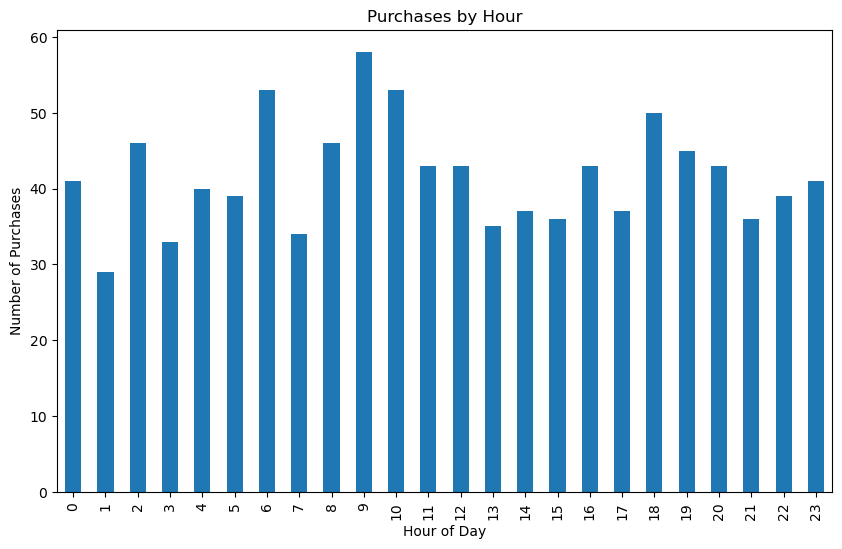

In [19]:
# Plot purchases by hour of the day
purchase_by_hour = data.groupby('hour_of_day').size()

plt.figure(figsize=(10, 6))
purchase_by_hour.plot(kind='bar')
plt.title('Purchases by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Purchases')
plt.show()


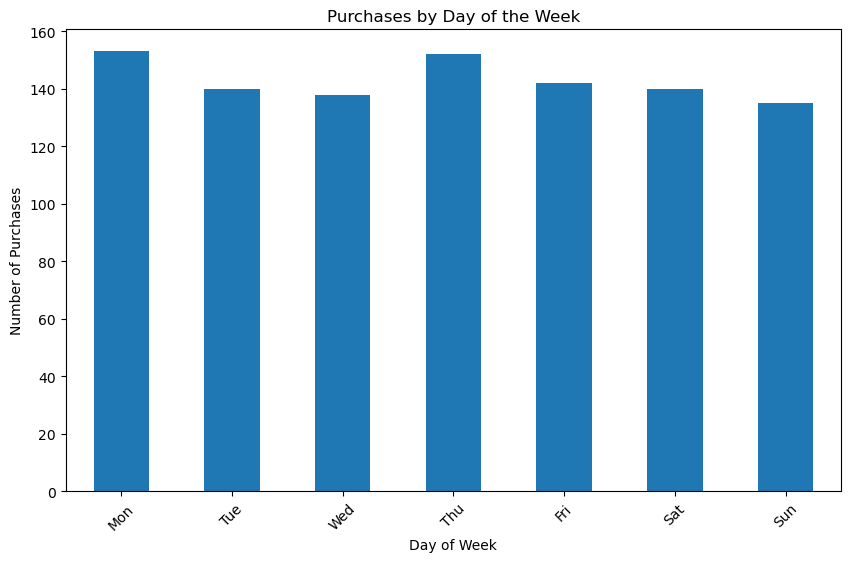

In [22]:
# Plot purchases by day of the week
purchase_by_day = data.groupby('day_of_week').size()

plt.figure(figsize=(10, 6))
purchase_by_day.plot(kind='bar')
plt.title('Purchases by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=np.arange(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)
plt.show()


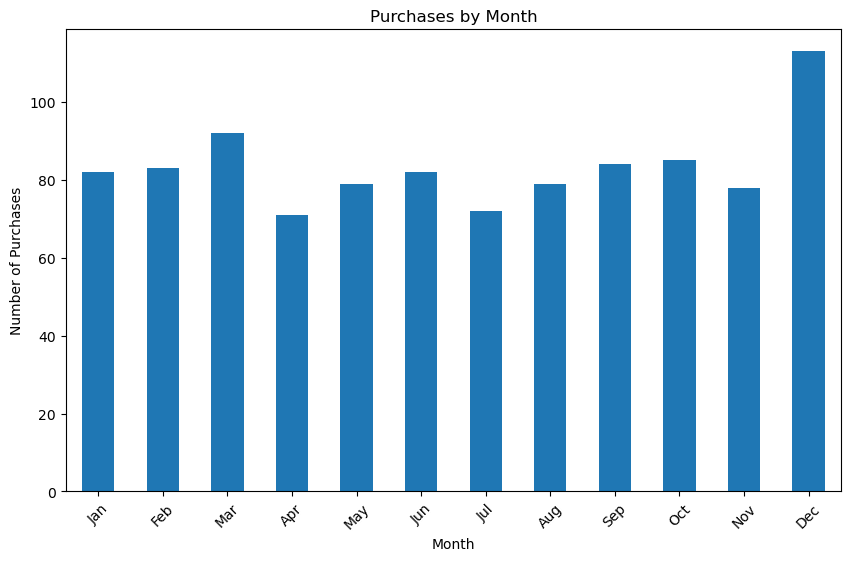

In [23]:
# Plot purchases by month
purchase_by_month = data.groupby('month').size()

plt.figure(figsize=(10, 6))
purchase_by_month.plot(kind='bar')
plt.title('Purchases by Month')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.xticks(ticks=np.arange(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


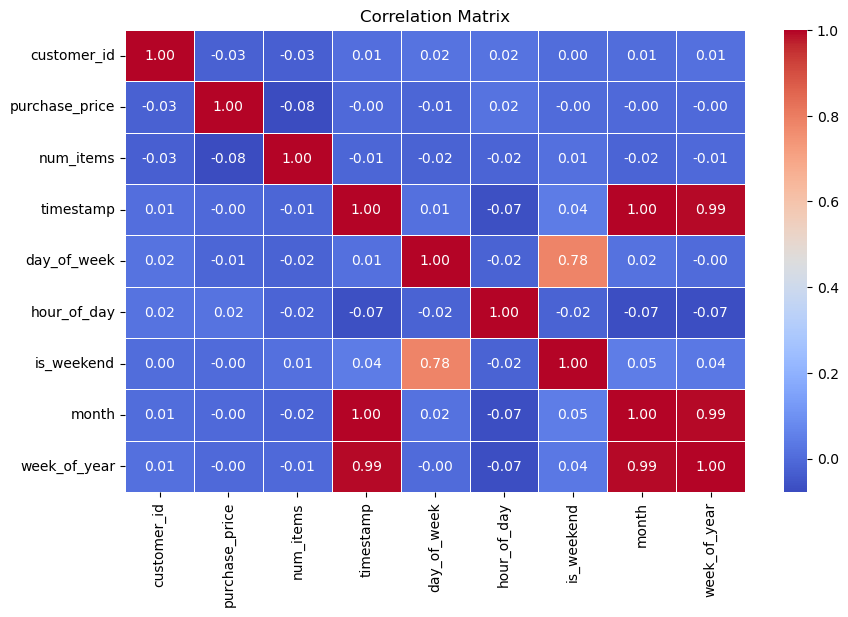

In [24]:
# Plot correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


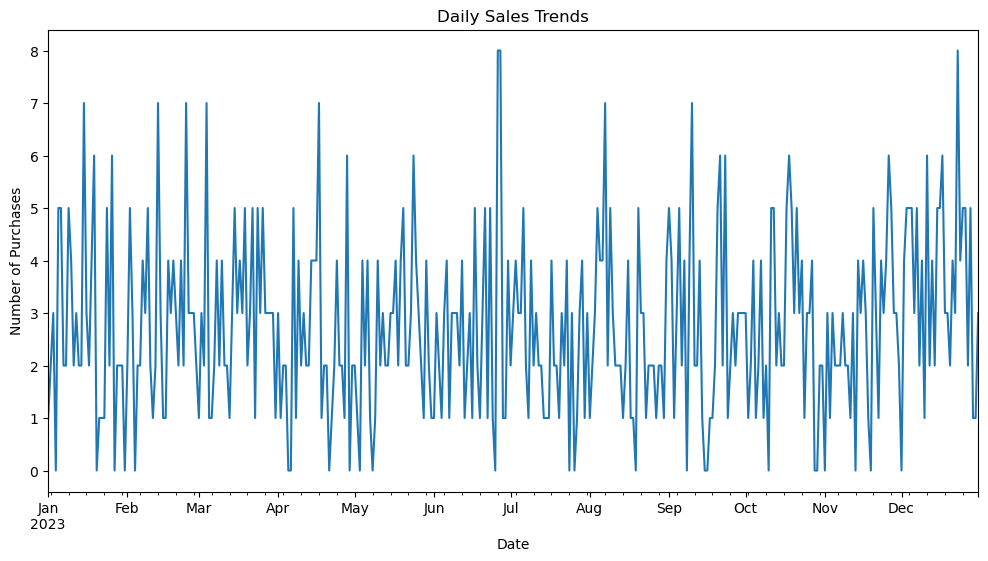

In [25]:
# Aggregate data by time (e.g., daily sales count)
daily_sales = data.resample('D', on='timestamp').size()

plt.figure(figsize=(12, 6))
daily_sales.plot(kind='line')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Number of Purchases')
plt.show()


# Feature Engieerning


In [32]:
customer_stats = data.groupby('customer_id').agg({
    'purchase_price': ['sum', 'mean', 'count'],
    'timestamp': ['min', 'max'],
    'hour_of_day':['min', 'max']
}).reset_index()
customer_stats.columns = ['customer_id', 'total_spent', 'avg_spent', 'num_purchases', 'first_purchase', 'last_purchase','min_hour','max_hour']


,customer_id,total_spent,avg_spent,num_purchases,first_purchase,last_purchase,avg_hour,min_hour,max_hour
0,1,362.82,60.4700,6,2023-06-03 16:18:00,2023-10-21 18:51:00,10.500000,2,18
1,2,538.52,53.8520,10,2023-03-11 09:59:00,2023-11-28 18:29:00,11.500000,3,22
2,3,181.89,45.4725,4,2023-06-09 16:28:00,2023-10-07 01:59:00,12.000000,1,21
3,4,198.51,66.1700,3,2023-01-13 07:50:00,2023-06-27 15:15:00,13.666667,7,19
4,5,531.58,53.1580,10,2023-01-15 10:01:00,2023-12-07 10:24:00,12.700000,4,23


In [35]:
def time_bucket(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'
customer_stats['time_bucket_min'] = customer_stats['min_hour'].apply(time_bucket)
customer_stats['time_bucket_max'] = customer_stats['max_hour'].apply(time_bucket)


In [36]:
customer_stats.head()

,customer_id,total_spent,avg_spent,num_purchases,first_purchase,last_purchase,avg_hour,min_hour,max_hour,time_bucket,time_bucket_min,time_bucket_max
0,1,362.82,60.4700,6,2023-06-03 16:18:00,2023-10-21 18:51:00,10.500000,2,18,Night,Night,Evening
1,2,538.52,53.8520,10,2023-03-11 09:59:00,2023-11-28 18:29:00,11.500000,3,22,Night,Night,Evening
2,3,181.89,45.4725,4,2023-06-09 16:28:00,2023-10-07 01:59:00,12.000000,1,21,Night,Night,Evening
3,4,198.51,66.1700,3,2023-01-13 07:50:00,2023-06-27 15:15:00,13.666667,7,19,Morning,Morning,Evening
4,5,531.58,53.1580,10,2023-01-15 10:01:00,2023-12-07 10:24:00,12.700000,4,23,Night,Night,Evening


In [38]:
customer_stats.drop(['avg_hour', 'min_hour', 'max_hour'], axis=1, inplace=True)


In [41]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'
customer_stats['season_of_first_purchase'] = customer_stats['first_purchase'].dt.month.apply(get_season)
customer_stats['season_of_last_purchase'] = customer_stats['last_purchase'].dt.month.apply(get_season)


In [42]:
customer_stats.head()

,customer_id,total_spent,avg_spent,num_purchases,first_purchase,last_purchase,time_bucket,time_bucket_min,time_bucket_max,season_of_first_purchase,season_of_last_purchase
0,1,362.82,60.4700,6,2023-06-03 16:18:00,2023-10-21 18:51:00,Night,Night,Evening,Summer,Fall
1,2,538.52,53.8520,10,2023-03-11 09:59:00,2023-11-28 18:29:00,Night,Night,Evening,Spring,Fall
2,3,181.89,45.4725,4,2023-06-09 16:28:00,2023-10-07 01:59:00,Night,Night,Evening,Summer,Fall
3,4,198.51,66.1700,3,2023-01-13 07:50:00,2023-06-27 15:15:00,Morning,Morning,Evening,Winter,Summer
4,5,531.58,53.1580,10,2023-01-15 10:01:00,2023-12-07 10:24:00,Night,Night,Evening,Winter,Winter


In [43]:
customer_stats = pd.get_dummies(customer_stats, columns=['time_bucket_min', 'time_bucket_max','season_of_first_purchase','season_of_last_purchase'], drop_first=True)


In [44]:
customer_stats.head()

,customer_id,total_spent,avg_spent,num_purchases,first_purchase,last_purchase,time_bucket,time_bucket_min_Evening,time_bucket_min_Morning,time_bucket_min_Night,time_bucket_max_Evening,time_bucket_max_Morning,time_bucket_max_Night,season_of_first_purchase_Spring,season_of_first_purchase_Summer,season_of_first_purchase_Winter,season_of_last_purchase_Spring,season_of_last_purchase_Summer,season_of_last_purchase_Winter
0,1,362.82,60.4700,6,2023-06-03 16:18:00,2023-10-21 18:51:00,Night,False,False,True,True,False,False,False,True,False,False,False,False
1,2,538.52,53.8520,10,2023-03-11 09:59:00,2023-11-28 18:29:00,Night,False,False,True,True,False,False,True,False,False,False,False,False
2,3,181.89,45.4725,4,2023-06-09 16:28:00,2023-10-07 01:59:00,Night,False,False,True,True,False,False,False,True,False,False,False,False
3,4,198.51,66.1700,3,2023-01-13 07:50:00,2023-06-27 15:15:00,Morning,False,True,False,True,False,False,False,False,True,False,True,False
4,5,531.58,53.1580,10,2023-01-15 10:01:00,2023-12-07 10:24:00,Night,False,False,True,True,False,False,False,False,True,False,False,True
